## MACHINE LEARNING ##

- It is the process by which computers learn to make descisions about data without being specifically programmed to do so

### Unsupervised Learning ###

 - Uncovering hidden patterns from unlaeled data

### Supervised Learning ###

 - The values to be predicted are already known - known as target variable

 TYPES:
 1) Classification:
 - Target variable consists of categories

 2) Regression:
 - Target variable is continuous

### Naming Convention: ###

- Feature = Predictor Variable = Independent Variable
- Target Variable = Dependent Variable = Response Variable

### Requirements before performing Supervised Learning: ###

- No missing values
- Data must be in numeric format
- Data must be stored in Pandas DataFrame or Numpy Array
- perform Exploratory Data Analysis(EDA) first

In [ ]:
# Scikit Learn Syntax

from sklearn.module import Model
model = Model()
model.fit(X, y)
predictions = model.predict(X_new)
print(predictions)

## Classifying Labels of Unseen Data ##

1) Build a model
2) Model learns from the labeled data we pass to it
3) Pass unlabeled data to the model as input (Training Data)
4) Model predicts the labels of the unseen data


## k - Nearest Neighbour (KNN)

- Predicts the label of a data point by looking at the k closest labeled data points
- Takes a majority vote and determines the label of the unseen data point by looking at the majority of the labels of the k nearest neighbours
- KNN creates a descision boundary to predict the label of unseen data

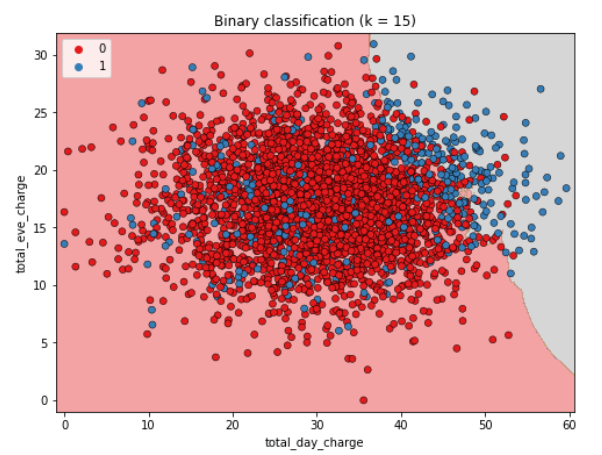



In [ ]:
# K-NEAREST NEIGHBOURS (KNN)

from sklearn.neighbors import KNeighboursClassifier
# .values attribute converts the X and y values to numpy arrays
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
knn = KNeighboursClassifier(n_neighbors = 15)
knn.fit(X, y)
# The unseen data is stored in a numpy array called X_new
X_new = np.array([
    [56.8, 17.5],
    [24.4, 24.1],
    [50.1, 10.9]])
# Predicting the target variable based on the unseen data:
predictions = knn.predict(X_new)
print("PredictionL {}".format(predictions))

## Measuring Model Performance ##

### Accuracy

- Accuracy = (Correct Predictions) / (Total Observations)
- Accuracy of the model is calculated on the test set of the data
- The data is split into the training set and the test set
- X_train, X_test, y_train, , y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, staratify = y)
 here,
 a) test_size - determines the size of the test set
 b) random_state - determines the seed of the test-train-split so that the experiment can be repeated with the same results
 c) stratify - The stratify argument in the train_test_split function in Python is used to ensure that the training and test sets have the same proportion of samples from each class. This is important when working with imbalanced datasets, where some classes are represented by more samples than others. 

## Model Complexity

- larger k = less complex model = can cause underfitting
- Smaller k = more complex model = can cause overfitting

- To determine the best value of k:
a) make a plot of Training and Test Accuracies for different KNN models for varying values of k
b) the value where the test accuracy is the maximum is the best value of k



In [ ]:
# SPLITING DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, , y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, staratify = y)

# FITTING A KNN MODEL

knn = KNeighboursClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

# ACCURACY
print(knn.score(X_test, y_test))

# MODEL COMPLEXITY
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighboursClassifier(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)


# Plot the training and test values of accuracies
plt.figure(figsize = (8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "Test Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()